# Plotting the Positive and Negative Grasping Rectangles on the original RGB image

This code cell reads an image and the corresponding positions of the positive and negative grasping rectangles and overlays it on the original RGB image for visualization of the rectangular areas.

Images saved to the folder: \pcd0100.png
Images saved to the folder: \pcd0101.png
Images saved to the folder: \pcd0102.png
Images saved to the folder: \pcd0103.png
Images saved to the folder: \pcd0104.png
Images saved to the folder: \pcd0105.png
Images saved to the folder: \pcd0106.png
Images saved to the folder: \pcd0107.png
Images saved to the folder: \pcd0108.png
Images saved to the folder: \pcd0109.png
Images saved to the folder: \pcd0110.png
Images saved to the folder: \pcd0111.png
Images saved to the folder: \pcd0112.png
Images saved to the folder: \pcd0113.png
Images saved to the folder: \pcd0114.png
Images saved to the folder: \pcd0115.png
Images saved to the folder: \pcd0116.png
Images saved to the folder: \pcd0117.png
Images saved to the folder: \pcd0118.png
Images saved to the folder: \pcd0119.png
Images saved to the folder: \pcd0120.png
Images saved to the folder: \pcd0121.png
Images saved to the folder: \pcd0122.png
Images saved to the folder: \pcd0123.png
Images saved to 

C:\Users\laksh\AppData\Local\Temp\ipykernel_71492\1234821142.py:28: UserWarning: loadtxt: input contained no data: "D:\MS - ISU Stuff\Coursework\ME592\archive\01\pcd0154cneg.txt"
  coords_neg = np.loadtxt(working_dir + fname + 'cneg.txt')


Images saved to the folder: \pcd0161.png
Images saved to the folder: \pcd0162.png
Images saved to the folder: \pcd0163.png
Images saved to the folder: \pcd0164.png
Images saved to the folder: \pcd0165.png
Images saved to the folder: \pcd0166.png
Images saved to the folder: \pcd0167.png
Images saved to the folder: \pcd0168.png
Images saved to the folder: \pcd0169.png
Images saved to the folder: \pcd0170.png
Images saved to the folder: \pcd0171.png
Images saved to the folder: \pcd0172.png
Images saved to the folder: \pcd0173.png
Images saved to the folder: \pcd0174.png
Images saved to the folder: \pcd0175.png
Images saved to the folder: \pcd0176.png
Images saved to the folder: \pcd0177.png
Images saved to the folder: \pcd0178.png
Images saved to the folder: \pcd0179.png
Images saved to the folder: \pcd0180.png
Images saved to the folder: \pcd0181.png
Images saved to the folder: \pcd0182.png
Images saved to the folder: \pcd0183.png
Images saved to the folder: \pcd0184.png
Images saved to 

KeyboardInterrupt: 

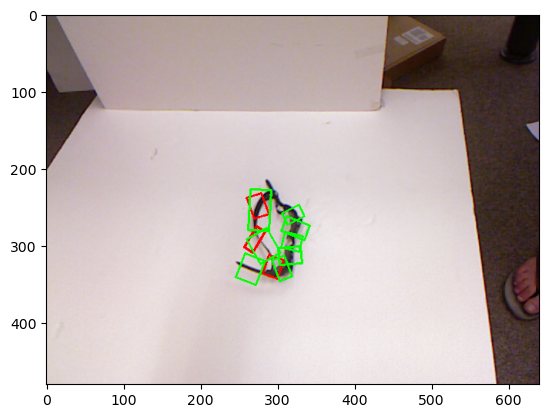

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import image as mpimg

for j in range(1,10):
    if j<10:
        fol_name = '\\0' + str(j)
    else:
        fol_name = '\\' + str(j)

    working_dir = r'D:\MS - ISU Stuff\Coursework\ME592\archive' + fol_name

#     os.chdir(working_dir)

    files = os.listdir(working_dir)
    ctr = len(files)//5

    for i in range(0,ctr):

        fname = '\pcd'+ '0' + str(j) + str(i)
        if i<10:
            fname = '\pcd' + '0' + str(j) + '0' + str(i)

        rgbimg = cv2.imread(working_dir + fname + 'r.png')

        coords_neg = np.loadtxt(working_dir + fname + 'cneg.txt')
        coords_pos = np.loadtxt(working_dir + fname + 'cpos.txt')

        if coords_neg.shape != ():
            for i in range(0,len(coords_neg),4):
                x1,y1 = coords_neg[i]
                x2,y2 = coords_neg[i+1]
                x3,y3 = coords_neg[i+2]
                x4,y4 = coords_neg[i+3]

                rectangle_corners = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], dtype=np.int32)
                
                cv2.polylines(rgbimg, [rectangle_corners], isClosed=True, color=(0, 0, 255), thickness=2)
                

        if coords_pos.shape != ():
            for i in range(0,len(coords_pos),4):
                x1,y1 = coords_pos[i]
                x2,y2 = coords_pos[i+1]
                x3,y3 = coords_pos[i+2]
                x4,y4 = coords_pos[i+3]

                if not (np.isnan(x1) or np.isnan(x2) or np.isnan(x3) or np.isnan(x4) or
                    np.isnan(y1) or np.isnan(y2) or np.isnan(y3) or np.isnan(y4)): 
                    rectangle_corners = np.array([[[x1, y1], [x2, y2], [x3, y3], [x4, y4]]], dtype=np.int32)

                cv2.polylines(rgbimg, [rectangle_corners], isClosed=True, color=(0, 255, 0), thickness=2)

        rgbimg = cv2.cvtColor(rgbimg, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbimg)

        img_name = fname + '.png'
        op_dir = "results"

        img_path = os.path.join(op_dir,img_name)
#         mpimg.imsave(img_path,rgbimg)

        print(f"Images saved to the folder: {img_path}")

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
rectangle_corners

# Obtaining an RGB-D image by combining the given point cloud data and RGB image

## Step 1: Getting the Depth Map

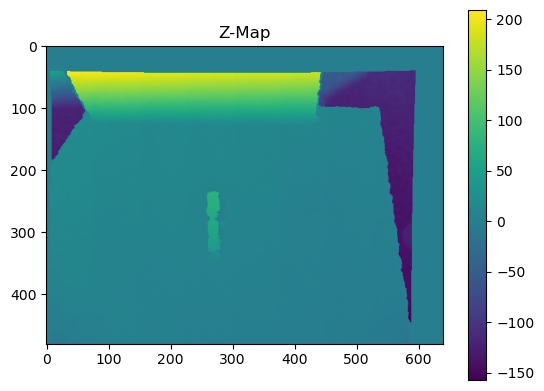

In [5]:
file_path = r'D:\MS - ISU Stuff\Coursework\ME592\archive\01\pcd0102.txt'
rgbimg = cv2.imread(r'D:\MS - ISU Stuff\Coursework\ME592\archive\01\pcd0102r.png')
with open(file_path, 'r') as f:
    # Skip header lines until 'DATA ascii'
    for line in f:
        if line.startswith('DATA ascii'):
            break

    # Read the numerical point cloud data
    pcd = np.loadtxt(f)

x,y,z,index = pcd[:,0],pcd[:,1],pcd[:,2],pcd[:,4]

# Assuming the point cloud data is organized as a 2D grid (image-like)
width = rgbimg.shape[1]
height = rgbimg.shape[0]

# Create an empty depth image
depth_image = np.full((height, width), fill_value=0)
depth_img = depth_image.reshape(-1)

# # Getting absolute depth
# NOTE: If we need absolute height from the camera we may use 'h' instead of 'z' in the next line. In this particular case,
# the object was not clearly visible when we used 'h', hence we preferred to use 'z'. However, this might vary depending on 
# the use case

# h = np.sqrt(x**2 + y**2 + z**2)

# Fill the depth image with the Z values based on pixel indices
depth_img[index.astype(int)] = z
depth_img = depth_img.reshape(height,width)

# Display the depth image
plt.imshow(depth_img, cmap='viridis')
plt.colorbar()
plt.title('Z-Map')
plt.show()

## Step 2: Combining the Depth Map with the RGB image to obtain the RGB-D image

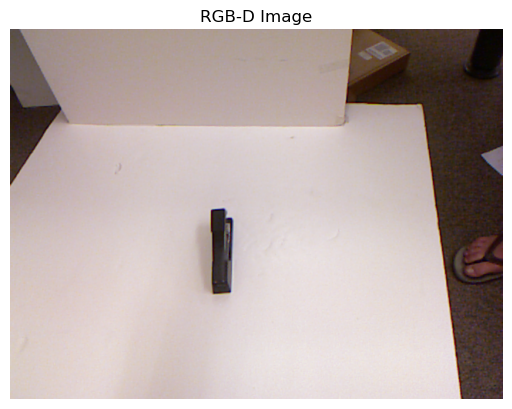

In [11]:
# Normalize the depth values to the range [0, 1]
normalized_depth = (depth_img.astype(float) - np.min(depth_img)) / (np.max(depth_img) - np.min(depth_img))

# Convert the normalized depth to a colormap (here, using the 'viridis' colormap)
depth_colormap = plt.cm.viridis(normalized_depth)

# Convert the colormap to RGB
depth_colormap_rgb = (depth_colormap[:, :, :3] * 255).astype(np.uint8)

# Combine the RGB image and the depth colormap
rgbd_image = np.zeros((rgb_data.shape[0], rgb_data.shape[1], 4), dtype=np.uint8)
rgbd_image[:,:,:3] = rgbimg
rgbd_image[:,:,3] = normalized_depth

# Display the RGB-D image
plt.imshow(cv2.cvtColor(rgbd_image, cv2.COLOR_BGR2RGB))
plt.title('RGB-D Image')
plt.axis('off')
plt.show()

C:\Users\laksh\AppData\Local\Temp\ipykernel_71492\2914227461.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=rgb_normalized.reshape(-1, 3),


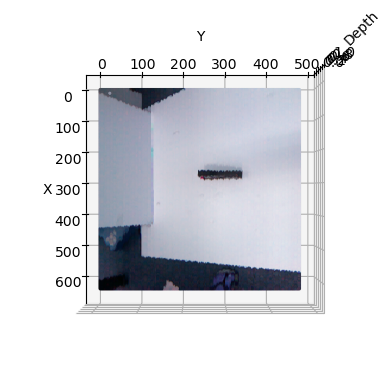

In [14]:
# Extract RGB and depth information
rgb_data = rgbd_image[:, :, :3]  # Assuming the first three channels are RGB
depth_data = rgbd_image[:, :, 3]  # Assuming the fourth channel is depth

# Create a point cloud using depth values
height, width, _ = rgb_data.shape
y, x = np.mgrid[:height, :width]
points = np.column_stack((x.flatten(), y.flatten(), depth_data.flatten()))

# Normalize RGB values to [0, 1] for visualization
rgb_normalized = rgb_data / 255.0

# Plot the point cloud with RGB colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=rgb_normalized.reshape(-1, 3),
           marker='o', s=1, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Depth')
ax.view_init(90, 0)

plt.show()

# Step 3: Segment the positive grasping rectangle regions from the RGB-D images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


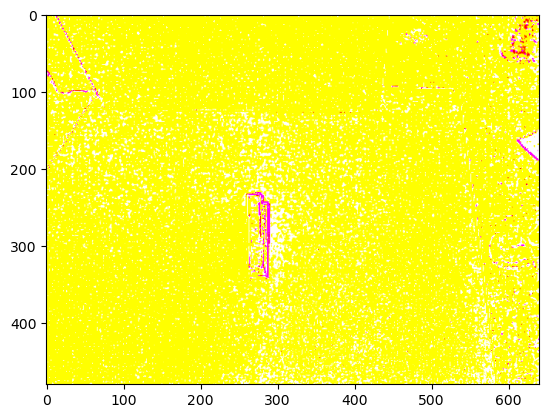

In [21]:
coords_pos = np.loadtxt(r'D:\MS - ISU Stuff\Coursework\ME592\archive\01\pcd0102cpos.txt')

posc = np.array([coords_pos],dtype = np.int32)

previmg = np.zeros_like(rgbimg)
resimg = []

for i in range(0,len(coords_pos),4):
    x1,y1 = coords_pos[i]
    x2,y2 = coords_pos[i+1]
    x3,y3 = coords_pos[i+2]
    x4,y4 = coords_pos[i+3]

    if not (np.isnan(x1) or np.isnan(x2) or np.isnan(x3) or np.isnan(x4) or
        np.isnan(y1) or np.isnan(y2) or np.isnan(y3) or np.isnan(y4)): 
        rectangle_corners = np.array([[[x1, y1], [x2, y2], [x3, y3], [x4, y4]]], dtype=np.int32)
        
        mask = np.zeros_like(rgbimg)
        
        cv2.fillPoly(mask, [rectangle_corners], color=(255, 255, 255))
        
        segmented_image = cv2.bitwise_and(rgbimg, mask)
        previmg = cv2.bitwise_or(previmg,segmented_image)
        resimg.append(segmented_image)

plt.imshow(previmg)

R,G,B = rgbimg[:,:,0], rgbimg[:,:,1], rgbimg[:,:,2]

Y = 0.299 * R + 0.587 * G + 0.114 * B
U = -0.14713 * R - 0.288862 * G + 0.436 * B
V = 0.615 * R - 0.51498 * G - 0.10001 * B

yuv_image = np.stack([Y, U, V], axis=-1)

plt.imshow(yuv_image)

# Step 4: Depth Segmentation

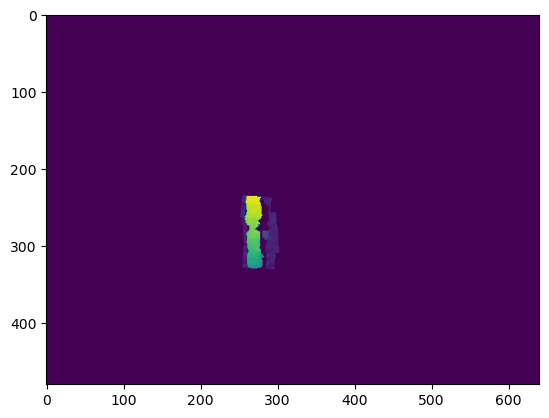

In [18]:
segmented_depth = (previmg[:,:,1]>0)*depth_img
plt.imshow(segmented_depth, cmap="viridis")

In [1]:
import open3d as o3d
file_path = r'D:\MS - ISU Stuff\Coursework\ME592\archive\01\pcd0102.txt'

with open(file_path, 'r') as f:
    # Skip header lines until 'DATA ascii'
    for line in f:
        if line.startswith('DATA ascii'):
            break

    # Read the numerical point cloud data
    pcd = np.loadtxt(f)

cld = o3d.geometry.PointCloud()
cld.points = o3d.utility.Vector3dVector(pcd)

# Visualize the point cloud
o3d.visualization.draw_plotly([cld])

ImportError: cannot import name 'url_quote' from 'werkzeug.urls' (C:\Users\laksh\anaconda3\lib\site-packages\werkzeug\urls.py)

In [194]:
pcd

array([[ 1.924064e+03, -6.471110e+02, -1.194176e+02,  0.000000e+00,
         2.554700e+04],
       [ 1.924412e+03, -6.496780e+02, -1.197147e+02,  0.000000e+00,
         2.554800e+04],
       [ 1.919929e+03, -6.505591e+02, -1.169839e+02,  0.000000e+00,
         2.554900e+04],
       ...,
       [ 7.147856e+02,  3.120237e+02, -9.527277e+00,  2.009216e-38,
         3.065860e+05],
       [ 7.149718e+02,  3.106502e+02, -9.686271e+00,  2.018471e-38,
         3.065870e+05],
       [ 7.151580e+02,  3.092766e+02, -9.845264e+00,  2.009288e-38,
         3.065880e+05]])

In [191]:
pip install open3d

     --------------------------------------- 62.9/62.9 MB 24.2 MB/s eta 0:00:00
     ---------------------------------------- 226.7/226.7 kB ? eta 0:00:00
     -------------------------------------- 139.4/139.4 kB 8.6 MB/s eta 0:00:00
     --------------------------------------- 10.2/10.2 MB 34.3 MB/s eta 0:00:00
     ---------------------------------------- 215.0/215.0 kB ? eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 36.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.5.2
    Uninstalling widgetsnbextension-3.5.2:
      Successfully uninstalled widgetsnbextension-3.5.2
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 2.2.2
    Uninstalling Werkzeug-2.2.2:
      Successfully uninstalled Werkzeug-2.2.2
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 1.0.0
    Uninstalling jupyterlab-widgets-1.0.0:
      Successfully uninstal

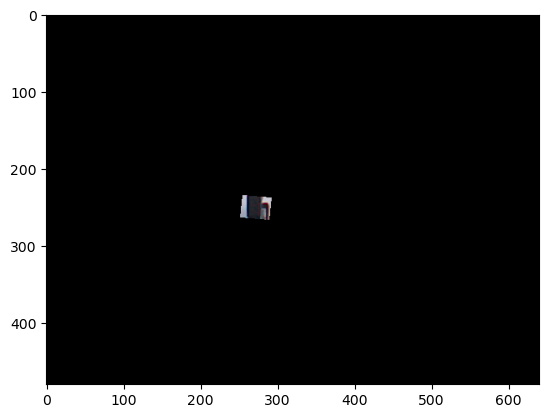

In [188]:
plt.imshow(resimg[3])

In [190]:
os.getcwd()

'D:\\MS - ISU Stuff\\Coursework\\ME592\\archive\\03'

In [20]:
import os
dir_path = r'D:\MS - ISU Stuff\Coursework\ME592\archive\01'

files = os.listdir(dir_path)

len(files)//3

166

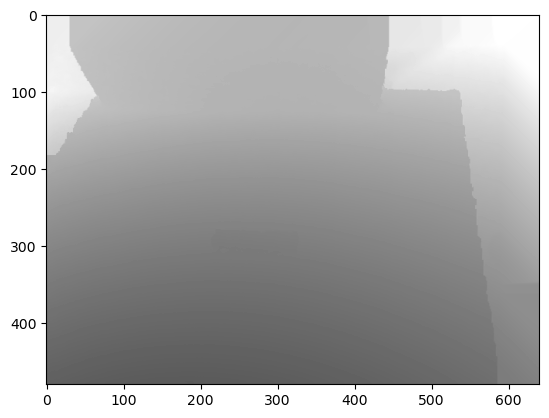

In [5]:
from PIL import Image

abc = Image.open(r'D:\MS - ISU Stuff\Coursework\ME592\archive\01\pcd0101d.tiff')
abce = np.array(abc)*1000

plt.imshow(abce,cmap='gray')

In [20]:
print(np.array(abc))

[[1.8988982  1.8988982  1.8988982  ... 2.0402176  2.0405838  2.040912  ]
 [1.8988982  1.8988982  1.8988982  ... 2.0406227  2.04095    2.0412405 ]
 [1.8988982  1.8988982  1.8988982  ... 2.0409887  2.0412774  2.0415306 ]
 ...
 [0.79075825 0.79033005 0.7899042  ... 0.9274281  0.92742825 0.92742836]
 [0.78748316 0.7870614  0.78664184 ... 0.92742795 0.9274281  0.92742825]
 [0.7864638  0.7860415  0.78562146 ... 0.9274277  0.9274279  0.92742807]]
